### 1. Import Libraries

In [83]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline
import os
from sklearn import preprocessing

### 2. Load Data

In [84]:
# Load Data
df = pd.read_csv("Loan_Data.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [85]:
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [86]:
df.shape

(614, 13)

### 3. Data Cleaning

In [87]:
df = df.dropna()

In [88]:
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [89]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y


### 4. Label Encoding

In [90]:
label_encoder = preprocessing.LabelEncoder()

In [91]:
text_columns = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Status']

In [92]:
from tqdm.auto import tqdm
for text_column in tqdm(text_columns):
    df[text_column] = label_encoder.fit_transform(df[text_column])

  0%|          | 0/7 [00:00<?, ?it/s]

### 5. Data Exploration and Visualizaion

In [93]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
1,LP001003,1,1,1,0,0,4583,1508.0,128.0,360.0,1.0,0,0
2,LP001005,1,1,0,0,1,3000,0.0,66.0,360.0,1.0,2,1
3,LP001006,1,1,0,1,0,2583,2358.0,120.0,360.0,1.0,2,1
4,LP001008,1,0,0,0,0,6000,0.0,141.0,360.0,1.0,2,1
5,LP001011,1,1,2,0,1,5417,4196.0,267.0,360.0,1.0,2,1


In [94]:
df1 = df.drop(['Loan_ID'], axis=1)

In [95]:
from collections import Counter
Counter(df.Loan_Status)

Counter({0: 148, 1: 332})

In [96]:
zero_class = df1[df1.Loan_Status==0]
zero_class.shape

(148, 12)

In [97]:
one_class = df1[df1.Loan_Status==1]
one_class.shape

(332, 12)

In [98]:
df1.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

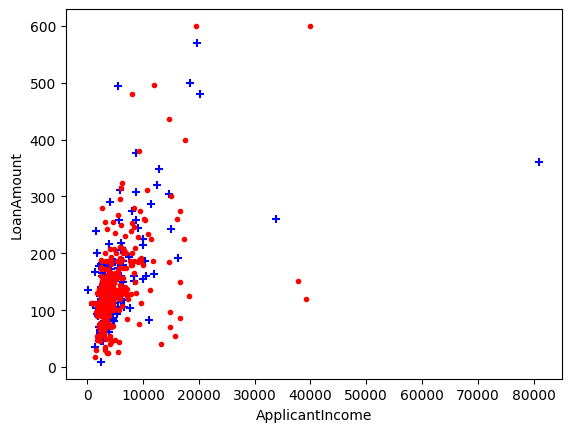

In [99]:
# ApplicantIncome vs LoanAmount scatter plot
import math
plt.xlabel('ApplicantIncome')
plt.ylabel('LoanAmount')
plt.scatter(zero_class['ApplicantIncome'],zero_class['LoanAmount'], color = 'blue', marker='+')
plt.scatter(one_class['ApplicantIncome'], one_class['LoanAmount'], color = 'red', marker='.')


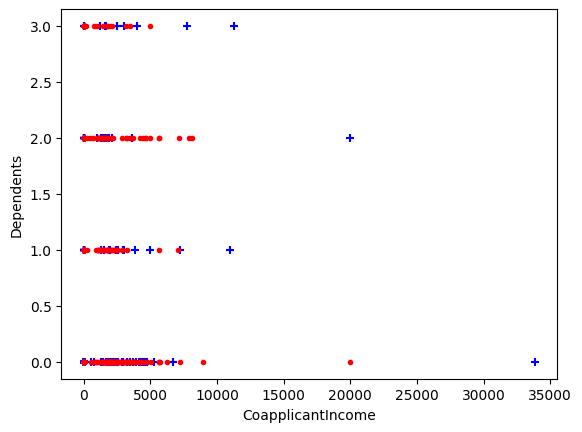

In [100]:
# Dependents vs CoapplicantIncome scatter plot
plt.xlabel('CoapplicantIncome')
plt.ylabel('Dependents')
plt.scatter(zero_class['CoapplicantIncome'],zero_class['Dependents'], color = 'blue', marker='+')
plt.scatter(one_class['CoapplicantIncome'], one_class['Dependents'], color = 'red', marker='.')

In [101]:
df.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
count,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000,480.000000
mean,0.820833,0.647917,0.777083,0.202083,0.137500,5364.231250,1581.093583,144.735417,342.050000,0.854167,1.022917,0.691667
std,0.383892,0.478118,1.020815,0.401973,0.344734,5668.251251,2617.692267,80.508164,65.212401,0.353307,0.776411,0.462287
min,0.000000,0.000000,0.000000,0.000000,0.000000,150.000000,0.000000,9.000000,36.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,0.000000,0.000000,0.000000,2898.750000,0.000000,100.000000,360.000000,1.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,0.000000,3859.000000,1084.500000,128.000000,360.000000,1.000000,1.000000,1.000000
75%,1.000000,1.000000,2.000000,0.000000,0.000000,5852.500000,2253.250000,170.000000,360.000000,1.000000,2.000000,1.000000
max,1.000000,1.000000,3.000000,1.000000,1.000000,81000.000000,33837.000000,600.000000,480.000000,1.000000,2.000000,1.000000


### 6. Scaling the data using Standard Scaler


In [102]:
# Scaling the data using Standard Scaler
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler = StandardScaler()

# scaler = MinMaxScaler()
scaled = scaler.fit_transform(df1.drop('Loan_Status',axis=1))
df_scaled = pd.DataFrame(scaled, columns=df1.columns[:-1])
df_scaled.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.467198,0.737162,0.218599,-0.503253,-0.399275,-0.137970,-0.027952,-0.208089,0.275542,0.413197,-1.318868
1,0.467198,0.737162,-0.762033,-0.503253,2.504541,-0.417536,-0.604633,-0.979001,0.275542,0.413197,1.259774
2,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.491180,0.297100,-0.307562,0.275542,0.413197,1.259774
3,0.467198,-1.356553,-0.762033,-0.503253,-0.399275,0.112280,-0.604633,-0.046446,0.275542,0.413197,1.259774
4,0.467198,0.737162,1.199231,-0.503253,2.504541,0.009319,0.999978,1.520245,0.275542,0.413197,1.259774


In [103]:
df_scaled.describe()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
count,4.800000e+02,4.800000e+02,480.000000,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02,4.800000e+02
mean,1.110223e-16,-6.291264e-17,0.000000,-1.147230e-16,1.110223e-17,2.590520e-17,1.572816e-17,-1.554312e-16,-2.146431e-16,7.586524e-17,-8.881784e-17
std,1.001043e+00,1.001043e+00,1.001043,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00,1.001043e+00
min,-2.140419e+00,-1.356553e+00,-0.762033,-5.032531e-01,-3.992747e-01,-9.208610e-01,-6.046330e-01,-1.687742e+00,-4.698022e+00,-2.420153e+00,-1.318868e+00
25%,4.671982e-01,-1.356553e+00,-0.762033,-5.032531e-01,-3.992747e-01,-4.354171e-01,-6.046330e-01,-5.562428e-01,2.755416e-01,4.131969e-01,-1.318868e+00
50%,4.671982e-01,7.371624e-01,-0.762033,-5.032531e-01,-3.992747e-01,-2.658318e-01,-1.899046e-01,-2.080892e-01,2.755416e-01,4.131969e-01,-2.954695e-02
75%,4.671982e-01,7.371624e-01,1.199231,-5.032531e-01,-3.992747e-01,8.623086e-02,2.570423e-01,3.141413e-01,2.755416e-01,4.131969e-01,1.259774e+00
max,4.671982e-01,7.371624e-01,2.179863,1.987072e+00,2.504541e+00,1.335768e+01,1.233512e+01,5.660787e+00,2.117602e+00,4.131969e-01,1.259774e+00


### 7. Splitting the columns in to dependent variable (x) and independent variable (y).


In [104]:
x = df_scaled
y = df1['Loan_Status']

In [105]:
# Split data in to train and test 
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [106]:
# Apply SVM Model
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC()
svc.fit(x_train, y_train)
y_pred=svc.predict(x_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.750


In [107]:
x_test

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
15,0.467198,0.737162,-0.762033,1.987072,-0.399275,-0.084282,-0.604633,-0.145919,0.275542,0.413197,-1.318868
124,0.467198,0.737162,-0.762033,-0.503253,-0.399275,0.453658,-0.604633,1.619718,0.275542,0.413197,1.259774
141,0.467198,0.737162,-0.762033,-0.503253,-0.399275,-0.134967,-0.604633,-0.891962,-2.487549,0.413197,-0.029547
263,0.467198,0.737162,2.179863,1.987072,-0.399275,-0.479877,0.002259,0.351444,0.275542,0.413197,-1.318868
170,0.467198,0.737162,-0.762033,-0.503253,-0.399275,-0.920861,0.083713,-0.121051,0.275542,0.413197,-1.318868
...,...,...,...,...,...,...,...,...,...,...,...
416,0.467198,-1.356553,1.199231,-0.503253,-0.399275,-0.313692,-0.604633,-0.431902,0.275542,-2.420153,-1.318868
417,-2.140419,-1.356553,-0.762033,1.987072,2.504541,2.260684,-0.604633,-0.245391,0.275542,0.413197,1.259774
107,0.467198,-1.356553,-0.762033,-0.503253,2.504541,0.280055,-0.604633,0.376312,-2.487549,0.413197,-0.029547
462,0.467198,0.737162,1.199231,-0.503253,2.504541,0.112280,-0.604633,0.749333,-1.566519,0.413197,-0.029547


In [108]:
y_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1])

### 8. Apply Support Vector Machine (SVM) Model:

<Axes: >

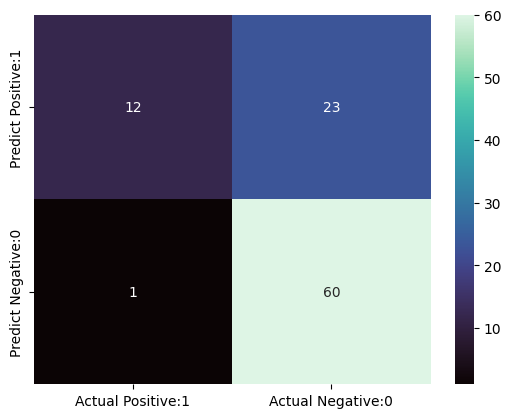

In [109]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [110]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.34      0.50        35
           1       0.72      0.98      0.83        61

    accuracy                           0.75        96
   macro avg       0.82      0.66      0.67        96
weighted avg       0.80      0.75      0.71        96



### 9. Apply SVM model using Linear Kernel function 


In [111]:
linear_classifier = SVC(kernel='linear')
linear_classifier.fit(x_train, y_train)
y_pred = linear_classifier.predict(x_test)
print('Model accuracy with linear kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with linear kernel : 0.771


<Axes: >

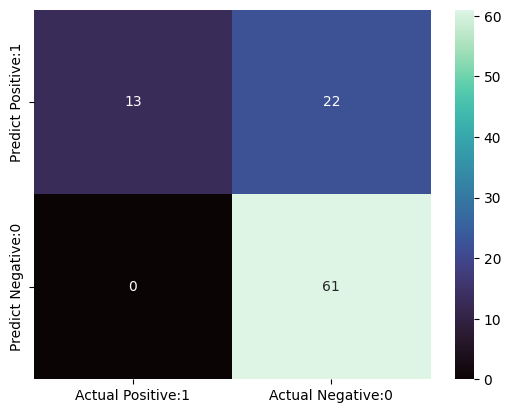

In [112]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [113]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.37      0.54        35
           1       0.73      1.00      0.85        61

    accuracy                           0.77        96
   macro avg       0.87      0.69      0.69        96
weighted avg       0.83      0.77      0.74        96



### 10. Apply SVM model using Gaussian RBF kernel function 

In [114]:
rbf_svc=SVC(kernel='rbf').fit(x_train,y_train)
y_pred = rbf_svc.predict(x_test)
print('Model accuracy with rbf kernel : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy with rbf kernel : 0.750


<Axes: >

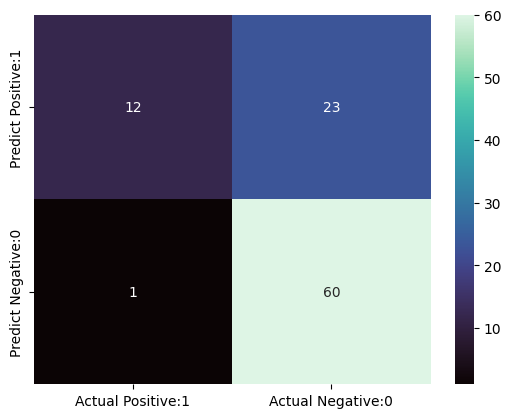

In [115]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:0'], 
                                 index=['Predict Positive:1', 'Predict Negative:0'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='mako')

In [116]:
# Classification Report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.34      0.50        35
           1       0.72      0.98      0.83        61

    accuracy                           0.75        96
   macro avg       0.82      0.66      0.67        96
weighted avg       0.80      0.75      0.71        96

